In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras. \
                            datasets.mnist.load_data()

In [3]:
# input information
print('Train input shape:',x_train.shape)
print('Test input shape:',x_test.shape)
print('Input data type:',x_train.dtype)

Train input shape: (60000, 28, 28)
Test input shape: (10000, 28, 28)
Input data type: uint8


In [4]:
# Normalize the data by dividing by 255, flatten inputs, and convert datatype to float32
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [6]:
# Now I make a fully connected network with layers of size 300, 200, 100.
# Make a final output layer of size 10 (for each of the 10 digit classes), with a softmax activation

# Initialize model constructor
model = Sequential()
# Add layers sequentially
model.add(Dense(300, activation=tf.nn.relu, input_shape=(784,)))
model.add(Dense(200, activation=tf.nn.relu))
model.add(Dense(100, activation=tf.nn.relu))
model.add(Dense(10, activation='softmax'))

In [19]:
# compile the model with sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [20]:
# train the model
NO_EPOCHS = 5
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=NO_EPOCHS,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 145us/sample - loss: 0.2474 - accuracy: 0.9248 - val_loss: 0.1163 - val_accuracy: 0.9653
Epoch 2/5
48000/48000 [==============================] - 5s 106us/sample - loss: 0.0985 - accuracy: 0.9701 - val_loss: 0.1212 - val_accuracy: 0.9629
Epoch 3/5
48000/48000 [==============================] - 5s 99us/sample - loss: 0.0684 - accuracy: 0.9794 - val_loss: 0.0987 - val_accuracy: 0.9718
Epoch 4/5
48000/48000 [==============================] - 6s 123us/sample - loss: 0.0525 - accuracy: 0.9845 - val_loss: 0.0936 - val_accuracy: 0.9763
Epoch 5/5
48000/48000 [==============================] - 5s 110us/sample - loss: 0.0411 - accuracy: 0.9875 - val_loss: 0.1072 - val_accuracy: 0.9759


In [24]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
#print('Test loss:', test_scores[0])
print('Test accuracy:', accuracy)



Test accuracy: 0.978


All tests passed!

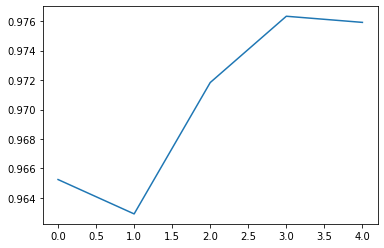

In [25]:
# plot accuracy over the epochs. Hint: look at history.history
plt.plot(range(NO_EPOCHS),history.history['val_accuracy']);

In [50]:
# Now train a CNN with 2 Conv2d layers, one pooling layer, a flattening layer, and a dense layer for the output.

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1), data_format='channels_last'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [54]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [55]:
# train the model
NO_EPOCHS = 5
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=NO_EPOCHS,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 77s 2ms/sample - loss: 0.1875 - accuracy: 0.9444 - val_loss: 0.0764 - val_accuracy: 0.9787
Epoch 2/5
48000/48000 [==============================] - 71s 1ms/sample - loss: 0.0689 - accuracy: 0.9800 - val_loss: 0.0645 - val_accuracy: 0.9814
Epoch 3/5
48000/48000 [==============================] - 72s 1ms/sample - loss: 0.0515 - accuracy: 0.9844 - val_loss: 0.0553 - val_accuracy: 0.9842
Epoch 4/5
48000/48000 [==============================] - 72s 1ms/sample - loss: 0.0426 - accuracy: 0.9872 - val_loss: 0.0500 - val_accuracy: 0.9864
Epoch 5/5
48000/48000 [==============================] - 72s 2ms/sample - loss: 0.0368 - accuracy: 0.9894 - val_loss: 0.0482 - val_accuracy: 0.9867


In [56]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', accuracy)



Test accuracy: 0.988


All tests passed!